# Homework 3

This shows a potential homework 3

In [1]:
import os
import glob
import matplotlib.pyplot as plt

%matplotlib notebook



['mdout\\polyAT_gb_md1_12Acut.mdout', 'mdout\\polyAT_vac_md1_12Acut.mdout', 'mdout\\polyAT_vac_md1_nocut.mdout', 'mdout\\polyAT_wat_md2.mdout']


<IPython.core.display.Javascript object>


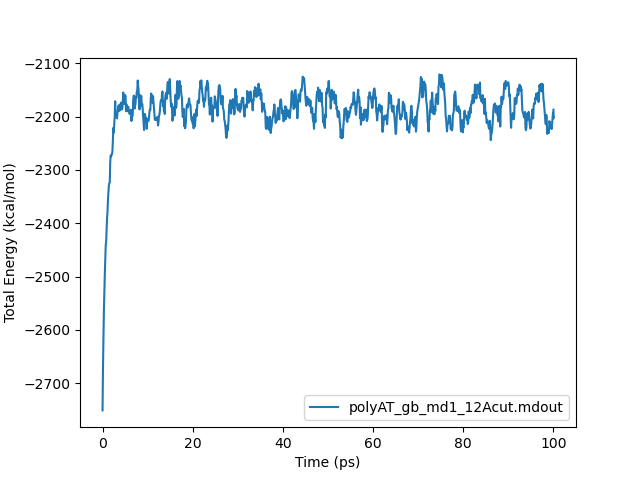

<IPython.core.display.Javascript object>


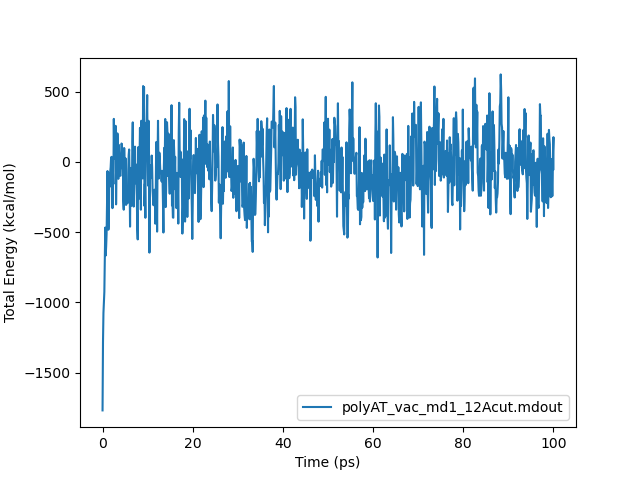

<IPython.core.display.Javascript object>


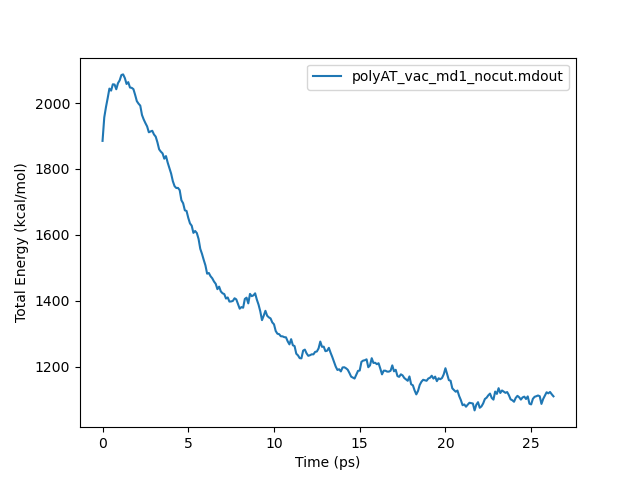

<IPython.core.display.Javascript object>


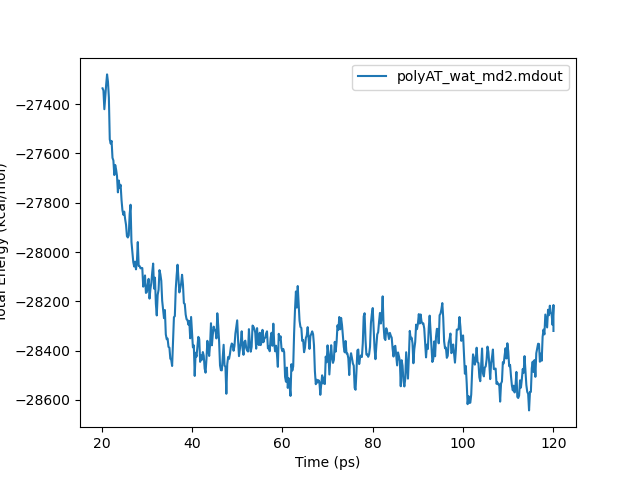

In [2]:
## Build the file paths
filepath = os.path.join('mdout', '*.mdout')

## Use glob to get the files
filenames = glob.glob(filepath)
print(filenames)

for filename in filenames:
    # Open the file
    f = open(filename,'r')

    # Read the data in the file.
    data = f.readlines()

    # Close the file.
    f.close()

    # Loop through the lines
    etot_values = []
    time_values = []
    plt.figure()
    for line in data:
        split_line = line.split()
        if "TIME(PS)" in line:
            time_values.append(float(split_line[5]))
        if "Etot" in line:
            etot_values.append(float(split_line[2]))
    
    my_label = os.path.basename(filename)
    plt.plot(time_values[:-1], etot_values[:-1], label=my_label)
    plt.xlabel("Time (ps)")
    plt.ylabel("Total Energy (kcal/mol)")
    plt.legend()

### Extension

Refactor your solution to contain a function. Create a function which takes in an mdout file name and a type of energy (Etot, EELEC, etc). Return two lists - a list of the time in picoseconds and a list containing the value for that energy type.

In order to do this extension, you need to know about the `index` function for lists. To get the location of an element in a list you can do `list_name.index('thing you are looking for')`. For example, if we have

```
split_line = ["Etot", "=", "-2750.8246", "EKtot", "=", "565.9592", "EPtot", "=",  "-3316.7837"]
```

we could get the location of the kinetic energy label using

```
split_line.index('Ektot')
```

This would return the number 3. The value associated with this label is at index 5.

The function signature and a documentation string are written for you (this docstring format is the NumPy format).

In [3]:
def get_energies(mdout_filepath, energy_type):
    """
    Get the energy values for the specified energy type from an amber mdout file.
    
    Parameters
    ----------
    mdout_filepath : str
        The path to the mdout file you want to analyze.
    energy_type: str
        The type of energy you want to pull from the mdout file.
        
    Returns
    -------
    time_values : list
        A list of the times in picoseconds for which data was printed.
    energy_values : list
        A list of the values for the specified energy type.
    """
    
    f = open(mdout_filepath,'r')

    # Read the data in the file.
    data = f.readlines()

    # Close the file.
    f.close()

    # Loop through the lines
    energy_values = []
    time_values = []
    
    for line in data:
        split_line = line.split()
        if "TIME(PS)" in line:
            time_values.append(float(split_line[5]))
        if energy_type in line:
            my_index = split_line.index(energy_type)
            energy_values.append(float(split_line[my_index + 2]))
        
    return time_values, energy_values

['mdout\\polyAT_gb_md1_12Acut.mdout', 'mdout\\polyAT_vac_md1_12Acut.mdout', 'mdout\\polyAT_vac_md1_nocut.mdout', 'mdout\\polyAT_wat_md2.mdout']


<IPython.core.display.Javascript object>


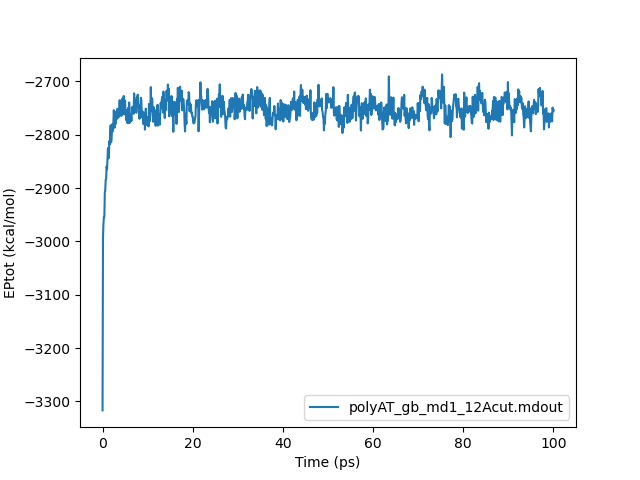

<IPython.core.display.Javascript object>


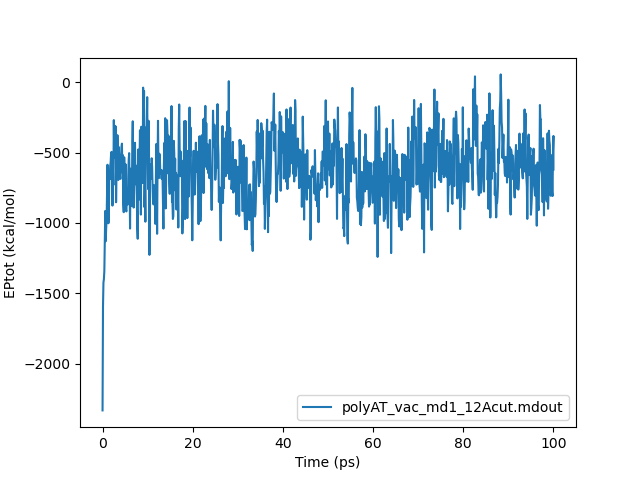

<IPython.core.display.Javascript object>


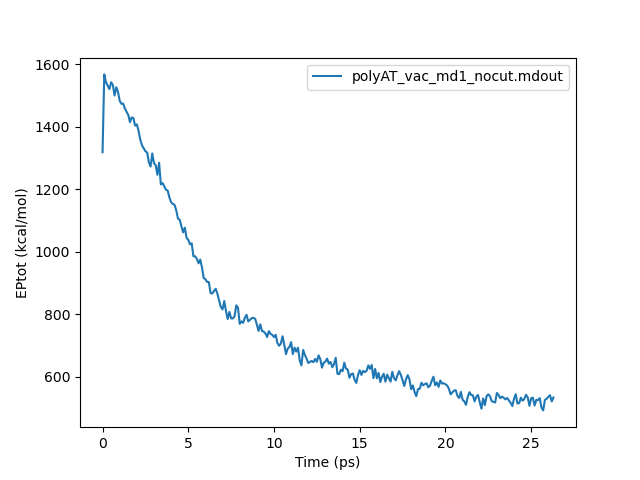

<IPython.core.display.Javascript object>


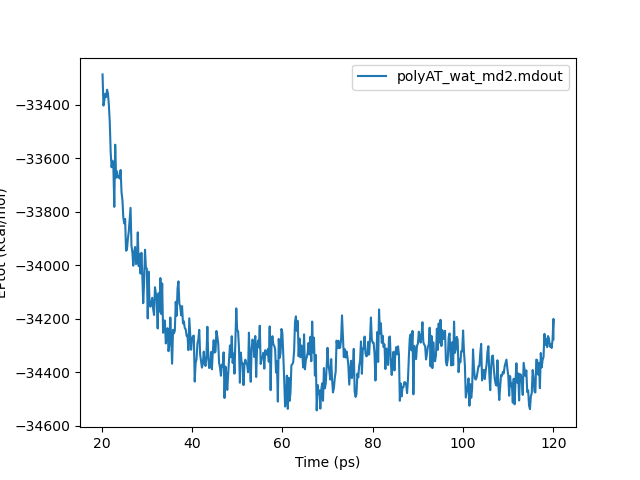

In [4]:
## Build the file paths
filepath = os.path.join('mdout', '*.mdout')

## Use glob to get the files
filenames = glob.glob(filepath)
print(filenames)

# set energy type
energy_type = 'EPtot'

for filename in filenames:
    plt.figure()
    time_values, energy_values = get_energies(filename, energy_type)
    
    my_label = os.path.basename(filename)
    plt.plot(time_values[:-1], energy_values[:-1], label=my_label)
    plt.xlabel("Time (ps)")
    plt.ylabel(F"{energy_type} (kcal/mol)")
    plt.legend()